In [1]:
dataset_dict = {}
dataset_dict['MNIST'] = None
dataset_dict['CIPHAR'] = None
dataset_dict['Synthetic1'] = None
dataset_dict['Synthetic2'] = None

kernel_dict = {}
kernel_dict["Gaussian"] = None
kernel_dict["Laplace"] = None

size_list = [10000] 

noise_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [2]:
import glob
files = glob.glob("../output/figure5*.txt")
files.sort()

filename = files[-1]

trainers = eval(open(filename, 'r').read())
trainers

{'D:MNIST K:Gaussian S:10000 N:0': {'dataset': 'MNIST',
  'kernel': 'Gaussian',
  'size': 10000,
  'noise': 0,
  'sgd_ce': 0.027000000000000024,
  'iterations': 6,
  'inv_ce': 0.0266,
  'inv_norm': 188.81133,
  'sgd_norm': 146.75803},
 'D:MNIST K:Gaussian S:10000 N:10': {'dataset': 'MNIST',
  'kernel': 'Gaussian',
  'size': 10000,
  'noise': 10,
  'sgd_ce': 0.12619999999999998,
  'iterations': 93,
  'inv_ce': 0.1294,
  'inv_norm': 424.34723,
  'sgd_norm': 353.93146},
 'D:MNIST K:Gaussian S:10000 N:20': {'dataset': 'MNIST',
  'kernel': 'Gaussian',
  'size': 10000,
  'noise': 20,
  'sgd_ce': 0.24039999999999995,
  'iterations': 999999,
  'inv_ce': 0.2516,
  'inv_norm': 613.9932,
  'sgd_norm': 470.4659},
 'D:MNIST K:Gaussian S:10000 N:30': {'dataset': 'MNIST',
  'kernel': 'Gaussian',
  'size': 10000,
  'noise': 30,
  'sgd_ce': 0.3903,
  'iterations': 999999,
  'inv_ce': 0.3702,
  'inv_norm': 710.8618,
  'sgd_norm': 545.91205},
 'D:MNIST K:Gaussian S:10000 N:40': {'dataset': 'MNIST',
  'ke

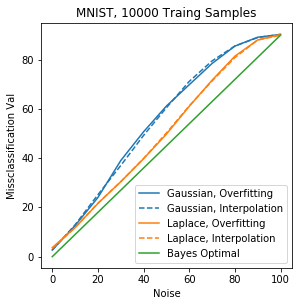

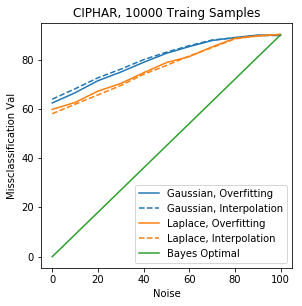

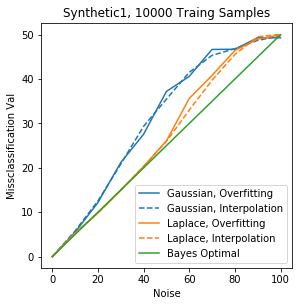

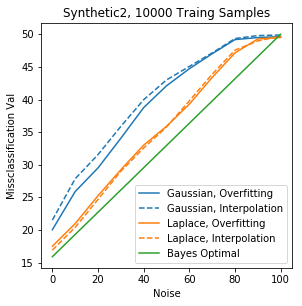

In [5]:
# Noise vs Error

import matplotlib.pyplot as plt

this_size = size_list[0]

for this_dataset in dataset_dict.keys():
        
    plt.figure(num=None, figsize=(4.5, 4.5))        
    ax = plt.gca()
    ax.set_prop_cycle(None)

    for this_kernel in kernel_dict.keys():

        inv = []
        sgd = []
        noise = []

        for name, trainer in trainers.items():  

            if trainer['dataset'] != this_dataset:
                continue

            if trainer['size'] != this_size:
                continue

            if trainer['kernel'] != this_kernel:
                continue

            sgd.append(trainer['sgd_ce'] * 100)
            inv.append(trainer['inv_ce'] * 100)
            noise.append(trainer['noise'])

        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(noise, sgd, label=this_kernel + ', Overfitting', color=color) 
        plt.plot(noise, inv, '--', label=this_kernel + ', Interpolation', color=color)    
        
    
    color = next(ax._get_lines.prop_cycler)['color']
    if this_dataset is 'Synthetic2':
        bayes = [15.9 + (50 - 15.9) * p / 100 for p in noise_list]
        plt.plot(noise_list, bayes, label='Bayes Optimal', color=color)
    elif this_dataset is 'Synthetic1':
        bayes = [(50) * p / 100 for p in noise_list]
        plt.plot(noise_list, bayes, label='Bayes Optimal', color=color)
    elif this_dataset in ['CIPHAR', 'MNIST']:
        bayes = [(90) * p / 100 for p in noise_list]
        plt.plot(noise_list, bayes, label='Bayes Optimal', color=color)

    plt.title(this_dataset + ', ' + str(this_size) + ' Traing Samples')
    plt.xlabel('Noise')
    plt.ylabel('Missclassification Val')
    plt.legend(loc='lower right')
    
    import matplotlib2tikz
    filename = '../tikz/Figure5_' + this_dataset + '.tex'
    matplotlib2tikz.save(filename)    
    
    filename = '../png/Figure5_' + this_dataset + '.png'
    plt.savefig(filename)
    plt.show()

In [4]:
# del trainers